In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("dataset.csv")
df.head(15)

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
5,1.239941,5.364270,1.279281,0.938585,True
6,0.003583,-0.027756,3.048730,NaN,True
7,-0.286887,0.905702,1.924124,NaN,True
8,-0.898322,-1.198319,0.694305,0.802052,True
9,-1.084037,0.509091,2.268160,0.351780,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


In [4]:
df.shape

(1999, 5)

In [5]:
df.isnull().sum()

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1897.0,0.814404,1.729538,-2.285499,-0.556433,0.084789,2.270955,5.929096
feature_2,1899.0,1.795843,1.605611,-7.363119,0.975148,1.881904,2.840511,7.549658
feature_3,1893.0,2.621096,1.474973,-5.363119,1.671905,2.499623,3.470200,9.549658
feature_4,1897.0,0.807499,1.768597,-3.006499,-0.563357,0.021857,2.319822,5.759355


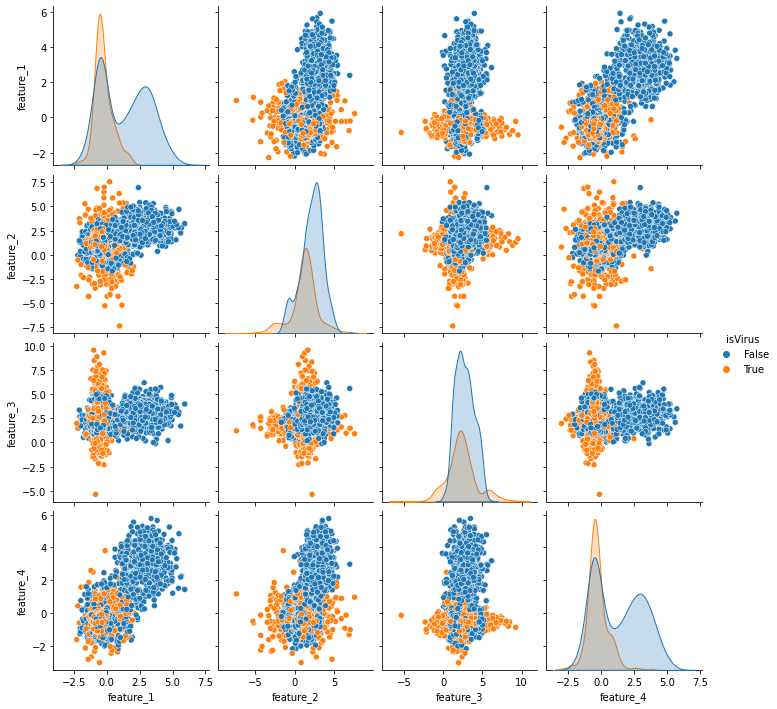

In [7]:
sns.pairplot(df, hue="isVirus")

In [8]:
df["isVirus"].value_counts()

False    1332
True      667
Name: isVirus, dtype: int64

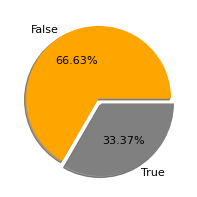

In [9]:
fig,ax = plt.subplots(figsize=(3,3),dpi=80)
c = df['isVirus'].value_counts()
labels = c.index
explode = (0, 0.08)
colors=["orange","gray"]
ax.pie(c.values, explode=explode, colors=colors,labels=labels, shadow=True, autopct='%1.2f%%')
plt.show()

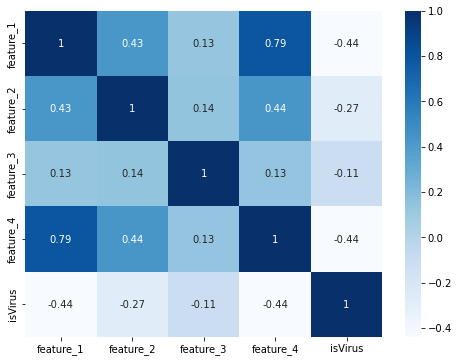

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

In [11]:
df.groupby(["isVirus"]).agg({
    "feature_1":"mean",
    "feature_2":"mean",
    "feature_3":"mean",
    "feature_4":"mean"})

,feature_1,feature_2,feature_3,feature_4
isVirus,,,,
False,1.352241,2.107789,2.740450,1.354239
True,-0.262122,1.173426,2.380677,-0.286848


In [12]:
df['feature_1'] = df['feature_1'].fillna(df.groupby('isVirus')['feature_1'].transform('mean'))
df['feature_2'] = df['feature_2'].fillna(df.groupby('isVirus')['feature_2'].transform('mean'))
df['feature_3'] = df['feature_3'].fillna(df.groupby('isVirus')['feature_3'].transform('mean'))
df['feature_4'] = df['feature_4'].fillna(df.groupby('isVirus')['feature_4'].transform('mean'))
df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False
1995,1.352241,3.562990,2.740450,2.499590,False
1996,4.059027,1.977436,2.144760,4.257220,False
1997,3.457310,3.962342,3.770837,3.243168,False


In [13]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64

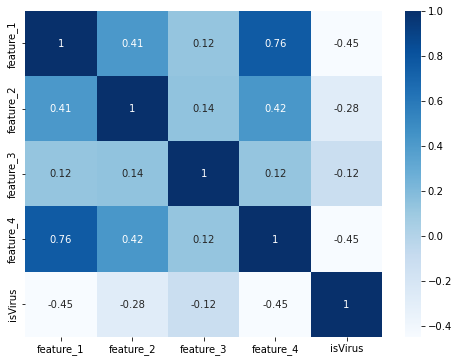

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

In [15]:
X = df.drop(columns='isVirus')
y = df['isVirus']
X,y

(      feature_1  feature_2  feature_3  feature_4
 0     -0.233467   0.308799   2.484015   1.732721
 1      1.519003   1.238482   3.344450   0.783744
 2      0.400640   1.916748   3.291096  -0.918519
 3     -1.616474   0.209703   1.461544  -0.291837
 4      1.480515   5.299829   2.640670   1.867559
 ...         ...        ...        ...        ...
 1994   2.532559   2.139847   3.859104   2.190373
 1995   1.352241   3.562990   2.740450   2.499590
 1996   4.059027   1.977436   2.144760   4.257220
 1997   3.457310   3.962342   3.770837   3.243168
 1998   3.578521   3.349654   2.740450   1.562209
 
 [1999 rows x 4 columns],
 0       False
 1       False
 2       False
 3       False
 4        True
         ...  
 1994    False
 1995    False
 1996    False
 1997    False
 1998    False
 Name: isVirus, Length: 1999, dtype: bool)

In [16]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
list_model = np.array([]); str_model = np.array(['DecisioneTreeClassifier','RandomForestClassifier','LogisticRegression','SVC','KNeighborsClassifier','MLPClassifier'])

list_model = np.append(list_model, DecisionTreeClassifier(max_depth=1000, criterion='gini',random_state=42))
list_model = np.append(list_model, RandomForestClassifier(n_estimators=100, max_depth=1000, criterion='gini',random_state=42))
list_model = np.append(list_model, LogisticRegression(max_iter=1000,random_state=42))
list_model = np.append(list_model, SVC(kernel='rbf', probability=True, degree=3,random_state=42))
list_model = np.append(list_model, KNeighborsClassifier(n_neighbors=10))
list_model = np.append(list_model, MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.01,max_iter=400,tol=0.0001,random_state=42))

In [19]:
from sklearn.metrics import accuracy_score,log_loss

def count_error(y_true,y_pred):
    err = 0
    for i in range(len(y_true)):
        if(y_true[i]!=y_pred[i]): err+=1
    return err

In [20]:
from sklearn.model_selection import train_test_split
import time
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
accuracy_array = np.array([])

for i in range(len(list_model)):
    print(f"Model = {str_model[i]}")
    start_time = time.time()
    print(list_model[i])
    list_model[i].fit(X_train,y_train)

    pred_Train = list_model[i].predict(X_train)
    pred_proba_Train = list_model[i].predict_proba(X_train)
    pred_Test = list_model[i].predict(X_test)
    pred_proba_Test = list_model[i].predict_proba(X_test)
    
    acc_test = accuracy_score(y_test, pred_Test)
    accuracy_array = np.append(accuracy_array,acc_test)
    print(f"Accuracy train = {accuracy_score(y_train, pred_Train)},loss train = {log_loss(y_train, pred_proba_Train)}, errors train = {count_error(y_train, pred_Train)} out of {len(y_train)}")
    print(f"Accuracy test = {acc_test},loss test = {log_loss(y_test, pred_proba_Test)}, errors test = {count_error(y_test, pred_Test)} out of {len(y_test)}")
    print(f"Training time = {time.time()-start_time}s")
    print()

Model = DecisioneTreeClassifier
DecisionTreeClassifier(max_depth=1000, random_state=42)
Accuracy train = 1.0,loss train = 9.992007221626413e-16, errors train = 0 out of 1499
Accuracy test = 0.872,loss test = 4.420963378548567, errors test = 64 out of 500
Training time = 0.021326780319213867s

Model = RandomForestClassifier
RandomForestClassifier(max_depth=1000, random_state=42)
Accuracy train = 1.0,loss train = 0.06930498925094893, errors train = 0 out of 1499
Accuracy test = 0.9,loss test = 0.24740935760800425, errors test = 50 out of 500
Training time = 0.8120403289794922s

Model = LogisticRegression
LogisticRegression(max_iter=1000, random_state=42)
Accuracy train = 0.6971314209472982,loss train = 0.48711742429440597, errors train = 454 out of 1499
Accuracy test = 0.662,loss test = 0.48869183781313835, errors test = 169 out of 500
Training time = 0.04791378974914551s

Model = SVC
SVC(probability=True, random_state=42)
Accuracy train = 0.8452301534356238,loss train = 0.31360205097876

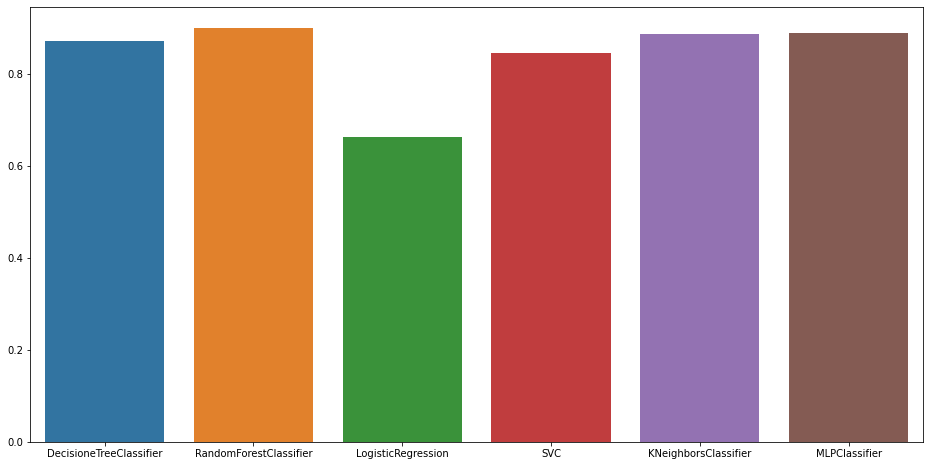

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x=str_model,y=accuracy_array)
plt.show()